In [11]:
import h5py
import glob
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
params = {'image.cmap': "Set2"}
matplotlib.rcParams.update(params)
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml
from scripts.common import *


In [3]:
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128/with_LAD/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0044_nofilter/'

inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)
x = np.linspace(0,Lx,int(Nx))
z = np.linspace(0,Lz,int(Nz))
kx = [2.0*np.pi/float(Lx)*w for w in range(0,int(Nx/2))]; kx = np.array(kx)
kz = [2.0*np.pi/float(Lz)*w for w in range(0,int(Nz/2))]; kz = np.array(kz)


flist = glob.glob(directory+"*grad_spec*")
flist.sort()
print([f.split('/')[-1] for f in flist])

# And read growth rates
# tlist,dlist,rates = growth_rates(directory+'shearlayer_')

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
['shearlayer_grad_spec_0582.dat.npy']


(2.0, 1.0)


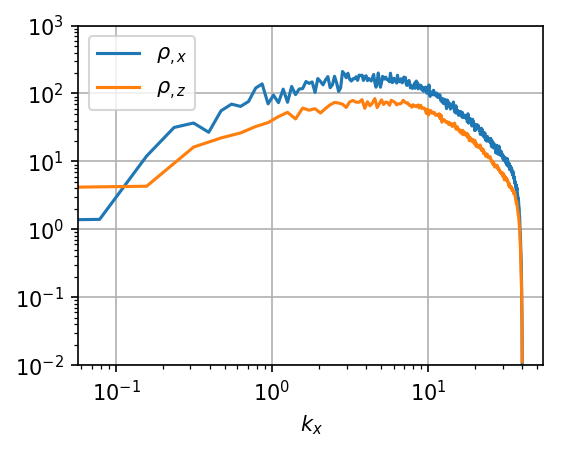

In [39]:
fname = flist[-1]
dat = np.load(fname)

specx = np.mean(dat[0,:,:],axis=1)
specz = np.mean(dat[1,:,:],axis=0)

plt.figure(figsize=(4,3),dpi=150)
plt.loglog(kx,specx[:Nx/2])
plt.loglog(kz,specz[:Nz/2])
plt.ylim([1e-2,1000])
plt.grid(True)
plt.legend([r'$\rho_{,x}$',r'$\rho_{,z}$'])
plt.xlabel(r'$k_x$')
print(inp.Mc,inp.rr)
# plt.savefig(directory+'/img/grad_spec.png',dpi=200,bbox_inches='tight')

Text(0.5,0,'$k_x$')

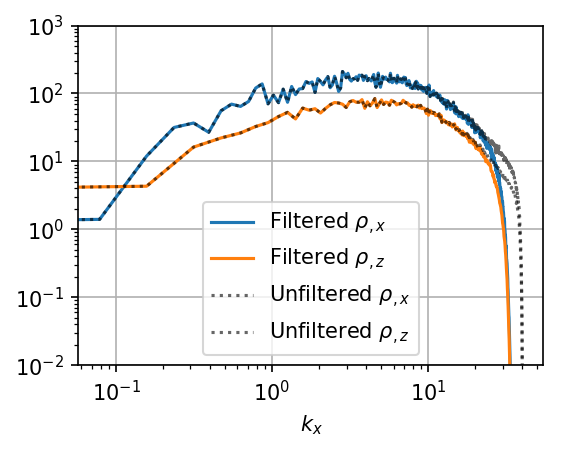

In [49]:
# With/without filtering

plt.figure(figsize=(4,3),dpi=150)

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0044/'
flist = glob.glob(directory+"*grad_spec*")
flist.sort()
fname = flist[-1]
dat = np.load(fname)
specx = np.mean(dat[0,:,:],axis=1)
specz = np.mean(dat[1,:,:],axis=0)
plt.loglog(kx,specx[:Nx/2],color='C0',label=r'Filtered $\rho_{,x}$')
plt.loglog(kz,specz[:Nz/2],color='C1',label=r'Filtered $\rho_{,z}$')

directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/restart_0044_nofilter/'
flist = glob.glob(directory+"*grad_spec*")
flist.sort()
fname = flist[-1]
dat = np.load(fname)
specx = np.mean(dat[0,:,:],axis=1)
specz = np.mean(dat[1,:,:],axis=0)
plt.loglog(kx,specx[:Nx/2],':',color='k',alpha=0.6,label=r'Unfiltered $\rho_{,x}$')
plt.loglog(kz,specz[:Nz/2],':',color='k',alpha=0.6,label=r'Unfiltered $\rho_{,z}$')

plt.ylim([1e-2,1000])
plt.grid(True)
plt.legend()
plt.xlabel(r'$k_x$')


Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
Params for this grid:
	N = 724x1024x362
	L = 80.0x80.0x40.0
Params for this grid:
	N = 512x724x256
	L = 80.0x80.0x40.0


Text(0.5,1,'$\\rho_{,z}$')

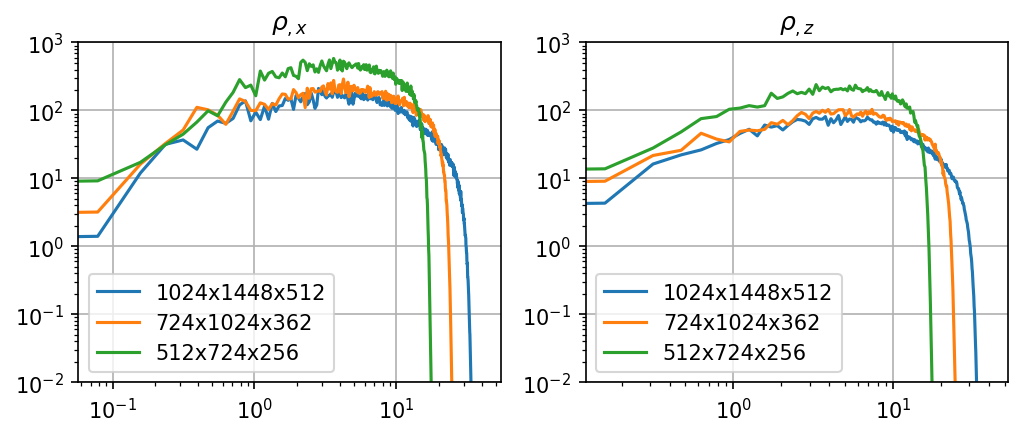

In [22]:
# Grid resolution
def get_grad_spec(directory): # gets last spectra
    flist = glob.glob(directory+"*grad_spec*npy")
    flist.sort()
    fname = flist[-1]
    dat = np.load(fname)
    specx = np.mean(dat[0,:,:],axis=1)
    specz = np.mean(dat[1,:,:],axis=0)
    return specx, specz

def get_wavenums(directory):
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
    Ny = int(Ny)
    y = np.linspace(Ly/2.,-Ly/2.,Ny)
    x = np.linspace(0,Lx,int(Nx))
    z = np.linspace(0,Lz,int(Nz))
    kx = [2.0*np.pi/float(Lx)*w for w in range(0,int(Nx/2))]; kx = np.array(kx)
    kz = [2.0*np.pi/float(Lz)*w for w in range(0,int(Nz/2))]; kz = np.array(kz)
    return Nx,Nz,kx,kz

fig,ax = plt.subplots(1,2,figsize=(8,3),dpi=150)
Mc = '20'

gridres = '1024x1448x512'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr1/%s/'%(Mc,gridres)
specx, specz = get_grad_spec(directory)
Nx,Nz,kx,kz = get_wavenums(directory)
ax[0].loglog(kx,specx[:Nx/2],'-',color='C0',label=gridres)
ax[1].loglog(kz,specz[:Nz/2],'-',color='C0',label=gridres)

gridres = '724x1024x362'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr1/%s/'%(Mc,gridres)
specx, specz = get_grad_spec(directory)
Nx,Nz,kx,kz = get_wavenums(directory)

ax[0].loglog(kx,specx[:Nx/2],'-',color='C1',label=gridres)
ax[1].loglog(kz,specz[:Nz/2],'-',color='C1',label=gridres)

gridres = '512x724x256'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr1/%s/'%(Mc,gridres)
specx, specz = get_grad_spec(directory)
Nx,Nz,kx,kz = get_wavenums(directory)
ax[0].loglog(kx,specx[:Nx/2],'-',color='C2',label=gridres)
ax[1].loglog(kz,specz[:Nz/2],'-',color='C2',label=gridres)

for a in ax:
    a.grid(True)
    a.legend()
    a.set_ylim([1e-2,1e3])
ax[0].set_title(r'$\rho_{,x}$')
ax[1].set_title(r'$\rho_{,z}$')
# plt.xlabel(r'$k_x$')